# **월간 데이콘 항공편 지연 예측 AI 경진대회 ✈️**
### 알고리즘 | 정형 | 분류 | 준지도학습 | 항공 | LogLoss

## 0-1. 배경

- 준지도학습은 특정한 목적이나 레이블이 거의 없는 상태에서 컴퓨터가 데이터의 패턴을 학습하여 레이블을 부여하는 머신러닝 기술
- 이번 월간 데이콘 항공편 지연 예측 AI 경진대회에서는 바로 이러한 준지도학습을 활용한 AI 모델 개발을 목표

## 0-2. 주제

- 일부 레이블만 주어진 학습 데이터셋을 이용한 항공편 지연 여부 예측



# **EDA 📊🧪**

<br>

# 1. 데이터 둘러보기



In [74]:
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/daconairplane/'

train = pd.read_csv(data_path + 'train.csv', index_col='ID')
test = pd.read_csv(data_path + 'test.csv', index_col='ID')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='ID')

In [75]:
train.shape, test.shape, submission.shape

((1000000, 18), (1000000, 17), (1000000, 2))

- 훈련데이터는 100만개
- 테스트데이터도 100만개
- 타깃값을 제외한 피처는 총 17개

In [76]:
train.head()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
ID,,,,,,,,,,,,,,,,,,
TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN


In [77]:
test.head()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number
ID,,,,,,,,,,,,,,,,,
TEST_000000,12,16,1156.0,NaN,0,0,IAH,12266,Texas,SAT,14683,Texas,191.0,United Air Lines Inc.,UA,NaN,N79402
TEST_000001,9,12,1500.0,1715.0,0,0,EWR,11618,New Jersey,ATL,10397,NaN,746.0,Delta Air Lines Inc.,DL,19790.0,N3765
TEST_000002,3,6,1600.0,1915.0,0,0,ORD,13930,Illinois,LGA,12953,New York,733.0,United Air Lines Inc.,UA,19977.0,N413UA
TEST_000003,5,18,1920.0,2045.0,0,0,OAK,13796,California,LAX,12892,California,337.0,Southwest Airlines Co.,WN,19393.0,N905WN
TEST_000004,7,7,1915.0,2152.0,0,0,FLL,11697,Florida,LAX,12892,California,2343.0,JetBlue Airways,B6,20409.0,N945JT


In [78]:
submission.head()

,Not_Delayed,Delayed
ID,,
TEST_000000,0,1
TEST_000001,0,1
TEST_000002,0,1
TEST_000003,0,1
TEST_000004,0,1


In [79]:
# 훈련 데이터를 상세히 살펴봅시다
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, TRAIN_000000 to TRAIN_999999
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Month                     1000000 non-null  int64  
 1   Day_of_Month              1000000 non-null  int64  
 2   Estimated_Departure_Time  890981 non-null   float64
 3   Estimated_Arrival_Time    890960 non-null   float64
 4   Cancelled                 1000000 non-null  int64  
 5   Diverted                  1000000 non-null  int64  
 6   Origin_Airport            1000000 non-null  object 
 7   Origin_Airport_ID         1000000 non-null  int64  
 8   Origin_State              890985 non-null   object 
 9   Destination_Airport       1000000 non-null  object 
 10  Destination_Airport_ID    1000000 non-null  int64  
 11  Destination_State         890921 non-null   object 
 12  Distance                  1000000 non-null  float64
 13  Airline         

In [80]:
train.head().T

ID,TRAIN_000000,TRAIN_000001,TRAIN_000002,TRAIN_000003,TRAIN_000004
Month,4,8,9,7,1
Day_of_Month,15,15,6,10,11
Estimated_Departure_Time,NaN,740.0,1610.0,905.0,900.0
Estimated_Arrival_Time,NaN,1024.0,1805.0,1735.0,1019.0
Cancelled,0,0,0,0,0
Diverted,0,0,0,0,0
Origin_Airport,OKC,ORD,CLT,LAX,SFO
Origin_Airport_ID,13851,13930,11057,12892,14771
Origin_State,Oklahoma,Illinois,North Carolina,California,California
Destination_Airport,HOU,SLC,LGA,EWR,ACV


- N = Nomial, C = Continuous, B = Binary, O = Ordinary
- Chatgpt에 각각의 피처들의 의미를 추론한 결과는 다음과 같다
    - `Month`:  출발 월을 나타냅니다. **(N)**
    - `Day_of_Month`:  출발하는 달의 날짜입니다. **(N)**
    - `Estimated_Departure_Time`:  예상 출발 시간입니다. **(C)** 
    - `Estimated_Arrival_Time`:  예상 도착 시간입니다.**(C)** 
    - `Cancelled`:  항공편이 취소되었는지 여부를 나타냅니다. (예: 0 = 취소되지 않음, 1 = 취소됨) **(B)** 
    - `Diverted`:  항공편이 우회되었는지 여부를 나타냅니다. (예: 0 = 우회되지 않음, 1 = 우회됨) **(B)** 
    - `Origin_Airport`: 출발 공항의 이름입니다. **(N)** 
    - `Origin_Airport_ID`:  출발 공항의 고유 식별자입니다. **(N)** 
    - `Origin_State`:  출발지의 주 (state)를 나타냅니다. **(N)** 
    - `Destination_Airport`: 도착 공항의 이름입니다. **(N)** 
    - `Destination_Airport_ID`:  도착 공항의 고유 식별자입니다. **(N)** 
    - `Destination_State`: 도착지의 주 (state)를 나타냅니다. **(N)** 
    - `Distance`:  출발지와 목적지 사이의 거리입니다. (일반적으로 마일 또는 킬로미터로 표시됨) **(C)** 
    - `Airline`:  항공편을 운영하는 항공사의 이름입니다. **(N)** 
    - `Carrier_Code(IATA)`: 항공사의 IATA 코드입니다. (국제 항공 운송 협회 코드)**(N)** 
    - `Carrier_ID(DOT)`: 항공사의 DOT 식별자입니다. (미국 교통부 코드)**(N)** 
    - `Tail_Number`: 항공기의 등록 번호 (비행기 고유 식별 번호)입니다.**(N)** 
    

<br>

- 동일한 의미를 가진 피처는 나중에 둘 중 하나를 제거하자

    - `Airline` (항공사 이름)과 `Carrier_Code`(IATA) (항공사의 IATA 코드)
        - 두 피처 모두 항공사를 식별하는 정보를 나타냅니다. 하나는 이름으로, 다른 하나는 IATA 코드로 표현됩니다.
    - `Carrier_Code(IATA)` (항공사의 IATA 코드)와 `Carrier_ID(DOT)` (항공사의 DOT 식별자)
        - 두 피처 모두 항공사를 식별하는 정보를 나타냅니다. 하나는 IATA 코드로, 다른 하나는 미국 교통부(DOT) 코드로 표현됩니다.
    - `Origin_Airport` (출발 공항 이름)과 O`rigin_Airport_ID` (출발 공항의 고유 식별자)
        - 두 피처 모두 출발 공항을 식별하는 정보를 나타냅니다. 하나는 이름으로, 다른 하나는 고유 식별자로 표현됩니다.
    - `Destination_Airport` (도착 공항 이름)과 `Destination_Airport_ID` (도착 공항의 고유 식별자)
        - 두 피처 모두 도착 공항을 식별하는 정보를 나타냅니다. 하나는 이름으로, 다른 하나는 고유 식별자로 표현됩니다.

## 1-1. 결측값 확인

In [81]:
import numpy as np
import missingno as msno

In [82]:
from tqdm import tqdm
tqdm.pandas()

## 1-2. 피처 요약표 만들기 + 결측값 처리

In [83]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['* 첫 번째 값 *'] = df.iloc[0].values
    summary['* 두 번째 값 *'] = df.iloc[1].values
    summary['* 세 번째 값 *'] = df.iloc[2].values
    
    return summary

In [84]:
# 타겟 피처 'Delay'를 제외한 train 데이터와 test 데이터를 결합
# 전처리 한번에 하기위해 합치자

train_no_target = train.drop('Delay', axis=1)
combined_data = pd.concat([train_no_target, test], axis=0, ignore_index=True)

In [85]:
resumetable(combined_data)

데이터 세트 형상: (2000000, 17)


,피처,데이터 타입,결측값 개수,고윳값 개수,* 첫 번째 값 *,* 두 번째 값 *,* 세 번째 값 *
0,Month,int64,0,12,4,8,9
1,Day_of_Month,int64,0,31,15,15,6
2,Estimated_Departure_Time,float64,218003,1418,NaN,740.0,1610.0
3,Estimated_Arrival_Time,float64,218088,1437,NaN,1024.0,1805.0
4,Cancelled,int64,0,1,0,0,0
5,Diverted,int64,0,1,0,0,0
6,Origin_Airport,object,0,379,OKC,ORD,CLT
7,Origin_Airport_ID,int64,0,379,13851,13930,11057
8,Origin_State,object,215520,52,Oklahoma,Illinois,North Carolina
9,Destination_Airport,object,0,378,HOU,SLC,LGA


In [86]:
combined_data = combined_data.drop(['Cancelled', 'Diverted', 
                                    'Origin_Airport_ID', 'Destination_Airport_ID'], axis = 1)

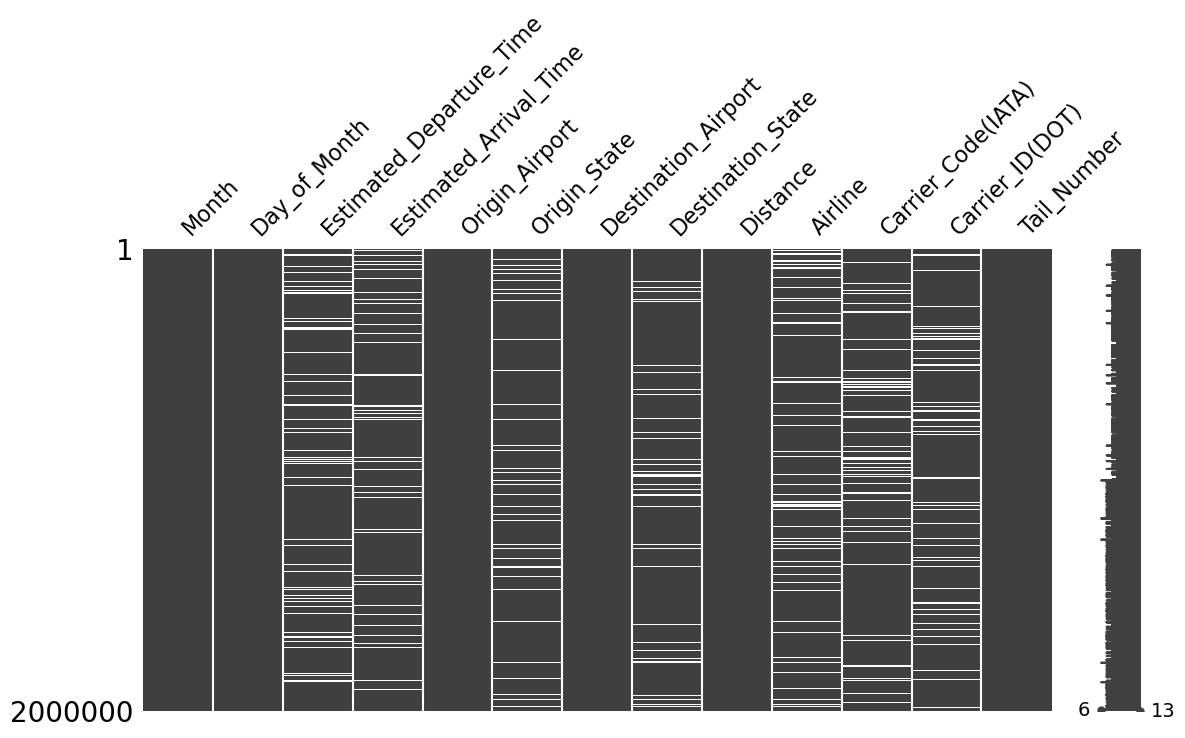

In [87]:
msno.matrix(df=combined_data.iloc[:, :], figsize=(13, 6));

In [88]:
resumetable(combined_data)

데이터 세트 형상: (2000000, 13)


,피처,데이터 타입,결측값 개수,고윳값 개수,* 첫 번째 값 *,* 두 번째 값 *,* 세 번째 값 *
0,Month,int64,0,12,4,8,9
1,Day_of_Month,int64,0,31,15,15,6
2,Estimated_Departure_Time,float64,218003,1418,NaN,740.0,1610.0
3,Estimated_Arrival_Time,float64,218088,1437,NaN,1024.0,1805.0
4,Origin_Airport,object,0,379,OKC,ORD,CLT
5,Origin_State,object,215520,52,Oklahoma,Illinois,North Carolina
6,Destination_Airport,object,0,378,HOU,SLC,LGA
7,Destination_State,object,215602,52,Texas,Utah,New York
8,Distance,float64,0,1604,419.0,1250.0,544.0
9,Airline,object,215447,28,Southwest Airlines Co.,SkyWest Airlines Inc.,American Airlines Inc.


In [89]:
# 포함관계를 이용한 지역 결측치 채우기
airport_to_state = combined_data[combined_data['Origin_State'].notnull()][['Origin_Airport', 'Origin_State']].drop_duplicates()
airport_to_state_dict = dict(zip(airport_to_state['Origin_Airport'], airport_to_state['Origin_State']))

def fill_state(row):
    if pd.isnull(row['Origin_State']):
        return airport_to_state_dict.get(row['Origin_Airport'], np.nan)
    else:
        return row['Origin_State']

combined_data['Origin_State'] = combined_data.progress_apply(fill_state, axis=1)

100%|██████████| 2000000/2000000 [00:36<00:00, 55527.85it/s]


In [90]:
destination_airport_to_state = combined_data[combined_data['Destination_State'].notnull()][['Destination_Airport', 'Destination_State']].drop_duplicates()
destination_airport_to_state_dict = dict(zip(destination_airport_to_state['Destination_Airport'], destination_airport_to_state['Destination_State']))

def fill_destination_state(row):
    if pd.isnull(row['Destination_State']):
        return destination_airport_to_state_dict.get(row['Destination_Airport'], np.nan)
    else:
        return row['Destination_State']

combined_data['Destination_State'] = combined_data.progress_apply(fill_destination_state, axis=1)

100%|██████████| 2000000/2000000 [00:36<00:00, 55432.83it/s]


In [91]:
resumetable(combined_data)

데이터 세트 형상: (2000000, 13)


,피처,데이터 타입,결측값 개수,고윳값 개수,* 첫 번째 값 *,* 두 번째 값 *,* 세 번째 값 *
0,Month,int64,0,12,4,8,9
1,Day_of_Month,int64,0,31,15,15,6
2,Estimated_Departure_Time,float64,218003,1418,NaN,740.0,1610.0
3,Estimated_Arrival_Time,float64,218088,1437,NaN,1024.0,1805.0
4,Origin_Airport,object,0,379,OKC,ORD,CLT
5,Origin_State,object,28,52,Oklahoma,Illinois,North Carolina
6,Destination_Airport,object,0,378,HOU,SLC,LGA
7,Destination_State,object,22,52,Texas,Utah,New York
8,Distance,float64,0,1604,419.0,1250.0,544.0
9,Airline,object,215447,28,Southwest Airlines Co.,SkyWest Airlines Inc.,American Airlines Inc.


In [92]:
missing_origin_airport = combined_data[combined_data['Origin_State'].isnull()]['Origin_Airport'].unique()
missing_destination_airport = combined_data[combined_data['Destination_State'].isnull()]['Destination_Airport'].unique()

print("Missing Origin Airports:")
print(missing_origin_airport)

print("Missing Destination Airports:")
print(missing_destination_airport)

Missing Origin Airports:
['RIW' 'SHR' 'DDC' 'DEC']
Missing Destination Airports:
['YNG' 'RIW' 'SHR' 'DEC']


In [93]:
missing_origin_airport = combined_data[combined_data['Origin_State'].isnull()]['Origin_Airport'].unique()
missing_destination_airport = combined_data[combined_data['Destination_State'].isnull()]['Destination_Airport'].unique()

print("Missing Origin Airports:")
print(missing_origin_airport)

print("Missing Destination Airports:")
print(missing_destination_airport)

Missing Origin Airports:
['RIW' 'SHR' 'DDC' 'DEC']
Missing Destination Airports:
['YNG' 'RIW' 'SHR' 'DEC']


In [94]:
airport_to_state_dict = {
    'RIW': 'Wyoming',
    'SHR': 'South Dakota',
    'DDC': 'Kansas',
    'DEC': 'Illinois',
    'YNG': 'Ohio',
    'SFB': 'Florida',
    'DEN': 'Colorado',
    'ORD': 'Illinois'
}

In [95]:
# airport_to_state_dict 딕셔너리를 이용하여 Origin_State 결측치 채우기
def fill_origin_state(row):
    if pd.isnull(row['Origin_State']):
        return airport_to_state_dict.get(row['Origin_Airport'], np.nan)
    else:
        return row['Origin_State']

combined_data['Origin_State'] = combined_data.progress_apply(fill_origin_state, axis=1)


100%|██████████| 2000000/2000000 [00:35<00:00, 55699.16it/s]


In [96]:
# airport_to_state_dict 딕셔너리를 이용하여 Origin_State 결측치 채우기
def fill_destination_state(row):
    if pd.isnull(row['Destination_State']):
        return airport_to_state_dict.get(row['Destination_Airport'], np.nan)
    else:
        return row['Destination_State']

combined_data['Destination_State'] = combined_data.progress_apply(fill_destination_state, axis=1)


100%|██████████| 2000000/2000000 [00:36<00:00, 55364.95it/s]


In [97]:
resumetable(combined_data)

데이터 세트 형상: (2000000, 13)


,피처,데이터 타입,결측값 개수,고윳값 개수,* 첫 번째 값 *,* 두 번째 값 *,* 세 번째 값 *
0,Month,int64,0,12,4,8,9
1,Day_of_Month,int64,0,31,15,15,6
2,Estimated_Departure_Time,float64,218003,1418,NaN,740.0,1610.0
3,Estimated_Arrival_Time,float64,218088,1437,NaN,1024.0,1805.0
4,Origin_Airport,object,0,379,OKC,ORD,CLT
5,Origin_State,object,0,52,Oklahoma,Illinois,North Carolina
6,Destination_Airport,object,0,378,HOU,SLC,LGA
7,Destination_State,object,0,52,Texas,Utah,New York
8,Distance,float64,0,1604,419.0,1250.0,544.0
9,Airline,object,215447,28,Southwest Airlines Co.,SkyWest Airlines Inc.,American Airlines Inc.


- 포함관계 state 채우기 끝
- 시간 데이터 결측치 처리 시작

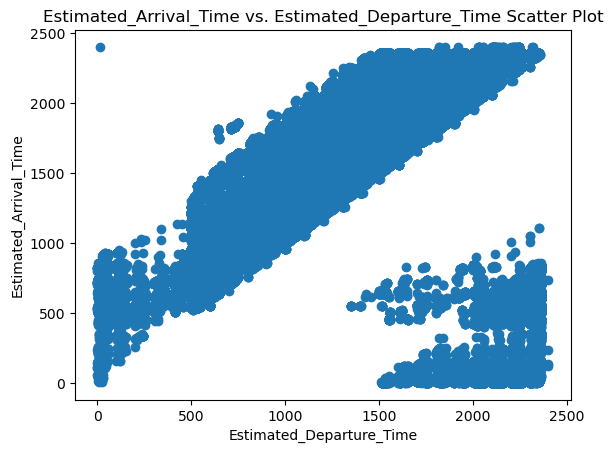

In [98]:
plt.scatter(x=combined_data['Estimated_Departure_Time'], y=combined_data['Estimated_Arrival_Time'])
plt.title('Estimated_Arrival_Time vs. Estimated_Departure_Time Scatter Plot')
plt.xlabel('Estimated_Departure_Time')
plt.ylabel('Estimated_Arrival_Time')
plt.show()

In [99]:
# Origin_Airport, Destination_Airport 피처가 모두 결측치가 아닌 경우에는 
# Estimated_Departure_Time과 Estimated_Arrival_Time을 이용하여 Flight_Time을 계산
def fill_flight_time(row):
    if not pd.isnull(row['Estimated_Departure_Time']) and not pd.isnull(row['Estimated_Arrival_Time']):
        if row['Estimated_Arrival_Time'] - row['Estimated_Departure_Time'] >= 0:
            return row['Estimated_Arrival_Time'] - row['Estimated_Departure_Time']
    
        else:
            return row['Estimated_Arrival_Time'] - row['Estimated_Departure_Time'] + 2400
            
        

combined_data['Flight_Time'] = combined_data.progress_apply(fill_flight_time, axis=1)

100%|██████████| 2000000/2000000 [01:05<00:00, 30546.78it/s]


In [100]:
resumetable(combined_data)

데이터 세트 형상: (2000000, 14)


,피처,데이터 타입,결측값 개수,고윳값 개수,* 첫 번째 값 *,* 두 번째 값 *,* 세 번째 값 *
0,Month,int64,0,12,4,8,9
1,Day_of_Month,int64,0,31,15,15,6
2,Estimated_Departure_Time,float64,218003,1418,NaN,740.0,1610.0
3,Estimated_Arrival_Time,float64,218088,1437,NaN,1024.0,1805.0
4,Origin_Airport,object,0,379,OKC,ORD,CLT
5,Origin_State,object,0,52,Oklahoma,Illinois,North Carolina
6,Destination_Airport,object,0,378,HOU,SLC,LGA
7,Destination_State,object,0,52,Texas,Utah,New York
8,Distance,float64,0,1604,419.0,1250.0,544.0
9,Airline,object,215447,28,Southwest Airlines Co.,SkyWest Airlines Inc.,American Airlines Inc.


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt


In [104]:
combined_data.loc[(combined_data['Distance'] < 1000) & (combined_data['Flight_Time'] > 2000), 
                  'Flight_Time'] = 2400 - combined_data['Flight_Time']

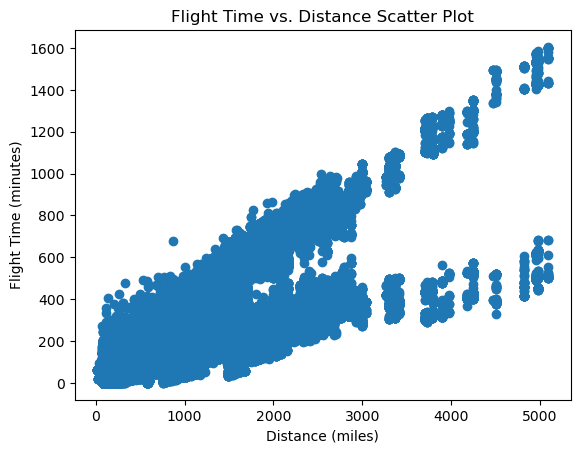

In [105]:
plt.scatter(x=combined_data['Distance'], y=combined_data['Flight_Time'])
plt.title('Flight Time vs. Distance Scatter Plot')
plt.xlabel('Distance (miles)')
plt.ylabel('Flight Time (minutes)')
plt.show()

In [111]:
from sklearn.linear_model import LinearRegression

# Distance와 Estimated_Departure_Time, Estimated_Arrival_Time의 차이(Flight_Time)가 결측치가 없는 데이터만 선택
df_reg = combined_data[['Distance', 'Flight_Time']].dropna()

# LinearRegression 모델 생성
reg_model = LinearRegression()

# 독립 변수(X)와 종속 변수(y) 생성
X = df_reg[['Distance']]
y = df_reg['Flight_Time']

# 회귀분석 모델 학습
reg_model.fit(X, y)

# 회귀분석 결과 출력
print('회귀계수:', reg_model.coef_)
print('절편:', reg_model.intercept_)
print('결정계수:', reg_model.score(X, y))


회귀계수: [0.1978258]
절편: 75.66151158007617
결정계수: 0.5661495860805681


In [112]:
def fill_flight_time_reg(row):
    if pd.isnull(row['Flight_Time']):
        return row['Distance'] * 0.1978258 + 75.66151158007617
    else:
        return row['Flight_Time']

combined_data['Flight_Time'] = combined_data.progress_apply(fill_flight_time_reg, axis=1)

100%|██████████| 2000000/2000000 [00:37<00:00, 53855.31it/s]


In [113]:
resumetable(combined_data)

데이터 세트 형상: (2000000, 14)


,피처,데이터 타입,결측값 개수,고윳값 개수,* 첫 번째 값 *,* 두 번째 값 *,* 세 번째 값 *
0,Month,int64,0,12,4,8,9
1,Day_of_Month,int64,0,31,15,15,6
2,Estimated_Departure_Time,float64,218003,1418,NaN,740.0,1610.0
3,Estimated_Arrival_Time,float64,218088,1437,NaN,1024.0,1805.0
4,Origin_Airport,object,0,379,OKC,ORD,CLT
5,Origin_State,object,0,52,Oklahoma,Illinois,North Carolina
6,Destination_Airport,object,0,378,HOU,SLC,LGA
7,Destination_State,object,0,52,Texas,Utah,New York
8,Distance,float64,0,1604,419.0,1250.0,544.0
9,Airline,object,215447,28,Southwest Airlines Co.,SkyWest Airlines Inc.,American Airlines Inc.


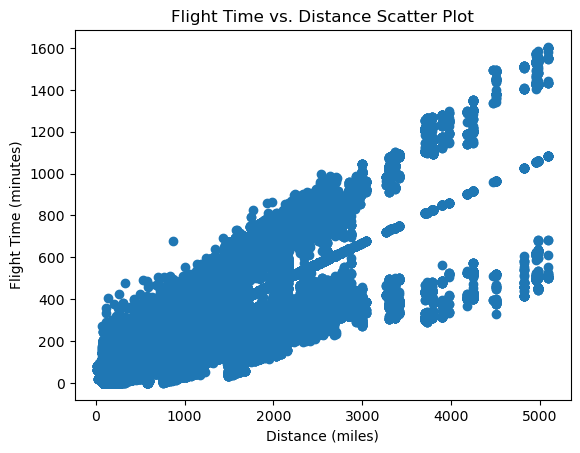

In [114]:
plt.scatter(x=combined_data['Distance'], y=combined_data['Flight_Time'])
plt.title('Flight Time vs. Distance Scatter Plot')
plt.xlabel('Distance (miles)')
plt.ylabel('Flight Time (minutes)')
plt.show()

- Flight_Time 채우기 끝

In [117]:
# Estimated_Departure_Time과 Estimated_Arrival_Time 결측치 처리하기
def fill_departure(row):
    if pd.isnull(row['Estimated_Departure_Time']) and not pd.isnull(row['Estimated_Arrival_Time']) and not pd.isnull(row['Flight_Time']):
        estimated_departure_time = row['Estimated_Arrival_Time'] - row['Flight_Time']
        if estimated_departure_time < 0:
            estimated_departure_time += 2400
        return estimated_departure_time
    else:
        return row['Estimated_Departure_Time']

def fill_arrival(row):
    if pd.isnull(row['Estimated_Arrival_Time']) and not pd.isnull(row['Estimated_Departure_Time']) and not pd.isnull(row['Flight_Time']):
        estimated_arrival_time = row['Estimated_Departure_Time'] + row['Flight_Time']
        if estimated_arrival_time >= 2400:
            estimated_arrival_time -= 2400
        return estimated_arrival_time
    else:
        return row['Estimated_Arrival_Time']

combined_data['Estimated_Departure_Time'] = combined_data.progress_apply(fill_departure, axis=1)
combined_data['Estimated_Arrival_Time'] = combined_data.progress_apply(fill_arrival, axis=1)

100%|██████████| 2000000/2000000 [00:39<00:00, 51197.34it/s]


In [126]:
resumetable(combined_data)

데이터 세트 형상: (2000000, 14)


,피처,데이터 타입,결측값 개수,고윳값 개수,* 첫 번째 값 *,* 두 번째 값 *,* 세 번째 값 *
0,Month,int64,0,12,4,8,9
1,Day_of_Month,int64,0,31,15,15,6
2,Estimated_Departure_Time,float64,23616,130152,NaN,740.0,1610.0
3,Estimated_Arrival_Time,float64,23616,110592,NaN,1024.0,1805.0
4,Origin_Airport,object,0,379,OKC,ORD,CLT
5,Origin_State,object,0,52,Oklahoma,Illinois,North Carolina
6,Destination_Airport,object,0,378,HOU,SLC,LGA
7,Destination_State,object,0,52,Texas,Utah,New York
8,Distance,float64,0,1604,419.0,1250.0,544.0
9,Airline,object,215447,28,Southwest Airlines Co.,SkyWest Airlines Inc.,American Airlines Inc.


In [127]:
print(combined_data.columns)

Index(['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport', 'Origin_State',
       'Destination_Airport', 'Destination_State', 'Distance', 'Airline',
       'Carrier_Code(IATA)', 'Carrier_ID(DOT)', 'Tail_Number', 'Flight_Time'],
      dtype='object')


In [128]:
def fill_missing_times(row):
    if pd.isna(row['Estimated_Departure_Time']) and pd.isna(row['Estimated_Arrival_Time']):
        other_row = combined_data[(combined_data['Origin_Airport'] == row['Origin_Airport']) & \
                                  (combined_data['Destination_Airport'] == row['Destination_Airport']) & \
                                  (~combined_data['Estimated_Departure_Time'].isnull()) & \
                                  (~combined_data['Estimated_Arrival_Time'].isnull())].sample(1, random_state=0)
        if len(other_row) > 0:
            row['Estimated_Departure_Time'] = other_row['Estimated_Departure_Time'].iloc[0]
            row['Estimated_Arrival_Time'] = other_row['Estimated_Arrival_Time'].iloc[0]
    
    return row

combined_data = combined_data.progress_apply(fill_missing_times, axis=1)

100%|██████████| 2000000/2000000 [1:53:43<00:00, 293.11it/s]  


In [129]:
resumetable(combined_data)

데이터 세트 형상: (2000000, 14)


,피처,데이터 타입,결측값 개수,고윳값 개수,* 첫 번째 값 *,* 두 번째 값 *,* 세 번째 값 *
0,Month,int64,0,12,4,8,9
1,Day_of_Month,int64,0,31,15,15,6
2,Estimated_Departure_Time,float64,0,130152,1145.0,740.0,1610.0
3,Estimated_Arrival_Time,float64,0,110592,1305.0,1024.0,1805.0
4,Origin_Airport,object,0,379,OKC,ORD,CLT
5,Origin_State,object,0,52,Oklahoma,Illinois,North Carolina
6,Destination_Airport,object,0,378,HOU,SLC,LGA
7,Destination_State,object,0,52,Texas,Utah,New York
8,Distance,float64,0,1604,419.0,1250.0,544.0
9,Airline,object,215447,28,Southwest Airlines Co.,SkyWest Airlines Inc.,American Airlines Inc.


In [ ]:
msno.matrix(df=combined_data.iloc[:, :], figsize=(13, 7));

In [ ]:
airport_combination_flight_time = combined_data[combined_data['Flight_Time'].notnull()].groupby(['Origin_Airport', 'Destination_Airport'])['Flight_Time'].mean().reset_index()

In [ ]:
# 새로운 피처 'Flight_Time' 생성

combined_data['Flight_Time'] = np.where(
    combined_data['Estimated_Arrival_Time'].isnull() | combined_data['Estimated_Departure_Time'].isnull(),
    np.nan,
    combined_data['Estimated_Arrival_Time'] - combined_data['Estimated_Departure_Time']
)

In [ ]:
# Origin_Airport와 Destination_Airport 조합별 평균 Flight_Time을 계산하여 결측치를 채우는 코드
def fill_flight_time(row):
    if pd.isnull(row['Flight_Time']):
        mean_flight_time = airport_combination_flight_time[(airport_combination_flight_time['Origin_Airport'] == row['Origin_Airport']) &
                                                            (airport_combination_flight_time['Destination_Airport'] == row['Destination_Airport'])]['Flight_Time']
        if not mean_flight_time.empty:
            return mean_flight_time.values[0]
        else:
            return np.nan
    else:
        return row['Flight_Time']

combined_data['Flight_Time'] = combined_data.progress_apply(fill_flight_time, axis=1)

In [ ]:
# Flight_Time을 사용하여 Estimated_Departure_Time 또는 Estimated_Arrival_Time의 결측치를 채울 수 있습니다.

def fill_departure_time(row):
    if pd.isnull(row['Estimated_Departure_Time']):
        if pd.notnull(row['Estimated_Arrival_Time']) and pd.notnull(row['Flight_Time']):
            return row['Estimated_Arrival_Time'] - row['Flight_Time']
        else:
            return np.nan
    else:
        return row['Estimated_Departure_Time']

combined_data['Estimated_Departure_Time'] = combined_data.progress_apply(fill_departure_time, axis=1)

def fill_arrival_time(row):
    if pd.isnull(row['Estimated_Arrival_Time']):
        if pd.notnull(row['Estimated_Departure_Time']) and pd.notnull(row['Flight_Time']):
            return row['Estimated_Departure_Time'] + row['Flight_Time']
        else:
            return np.nan
    else:
        return row['Estimated_Arrival_Time']

combined_data['Estimated_Arrival_Time'] = combined_data.progress_apply(fill_arrival_time, axis=1)

In [ ]:
# 결측치 채우기
# `Origin_Airport`와 `Destination_Airport`가 동시에 같은 다른 행을 이용해서 채우기
grouped_data = combined_data.groupby(['Origin_Airport', 'Destination_Airport'])

for group_name, group_df in tqdm(grouped_data, desc='Filling missing values'):
    # Estimated_Departure_Time과 Estimated_Arrival_Time의 평균 계산
    mean_departure_time = group_df['Estimated_Departure_Time'].mean()
    mean_arrival_time = group_df['Estimated_Arrival_Time'].mean()
    
    # 결측치에 평균값 적용
    combined_data.loc[group_df.index, 'Estimated_Departure_Time'] = group_df['Estimated_Departure_Time'].fillna(mean_departure_time)
    combined_data.loc[group_df.index, 'Estimated_Arrival_Time'] = group_df['Estimated_Arrival_Time'].fillna(mean_arrival_time)

In [ ]:
msno.matrix(df=combined_data.iloc[:, :], figsize=(13, 6));

- Airline, Carrier_Code(IATA), Carrier_ID(DOT) 피처의 결측치를 채우려면 다른 피처를 기준으로 유사한 값을 찾아보는 것이 좋습니다. 
- Origin_Airport와 Destination_Airport를 이용하여 동일한 경로에 있는 항공편을 찾아 해당 결측치를 채울 수 있습니다.

In [ ]:
# 결측치를 채울 피처 목록
columns_to_fill = ['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']

# 결측치를 채우기 위해 기준이 될 피처 목록
grouping_columns = ['Tail_Number']

# 그룹별 최빈값을 저장할 딕셔너리
group_mode_dict = {}



# 그룹별로 최빈값 계산
for _, group in tqdm(list(combined_data.groupby(grouping_columns)), desc='Calculating group modes', position=0, leave=True):
    group_key = tuple(group[col].iloc[0] for col in grouping_columns)
    modes = group[columns_to_fill].mode()
    # 최빈값이 없는 경우 빈 DataFrame 대신 None을 저장합니다.
    group_mode_dict[group_key] = modes.iloc[0] if not modes.empty else None
    

# 결측치를 채움
for col in columns_to_fill:
    tqdm.pandas(desc=f'Filling {col} with mode', position=0, leave=True)
    combined_data[col] = combined_data.progress_apply(
        lambda row: group_mode_dict[tuple(row[grouping_columns])][col] if pd.isna(row[col]) else row[col],
        axis=1
    )

In [ ]:
msno.matrix(df=combined_data.iloc[:, :], figsize=(13, 5));

In [ ]:
resumetable(combined_data)

In [ ]:
# 결측치를 채울 피처 목록
columns_to_fill = ['Airline']

# 결측치를 채우기 위해 기준이 될 피처 목록
grouping_columns = ['Tail_Number', 'Origin_Airport', 'Destination_State']

# 그룹별 최빈값을 저장할 딕셔너리
group_mode_dict = {}



# 그룹별로 최빈값 계산
for _, group in tqdm(list(combined_data.groupby(grouping_columns)), desc='Calculating group modes', position=0, leave=True):
    group_key = tuple(group[col].iloc[0] for col in grouping_columns)
    modes = group[columns_to_fill].mode()
    # 최빈값이 없는 경우 빈 DataFrame 대신 None을 저장합니다.
    group_mode_dict[group_key] = modes.iloc[0] if not modes.empty else None
    

# 결측치를 채움
for col in columns_to_fill:
    tqdm.pandas(desc=f'Filling {col} with mode', position=0, leave=True)
    combined_data[col] = combined_data.progress_apply(
        lambda row: group_mode_dict[tuple(row[grouping_columns])][col] if pd.isna(row[col]) else row[col],
        axis=1
    )

## 1-3. 추가할 수 있는 파생피처

- **요일**: Day_of_Month와 Month를 사용하여 해당 날짜의 요일 정보를 얻을 수 있습니다. 요일은 항공편 지연에 영향을 줄 수 있습니다.

- **시간대**: Estimated_Departure_Time와 Estimated_Arrival_Time을 사용하여 출발 및 도착 시간대를 구분할 수 있습니다. 예를 들어, 오전/오후 또는 4시간 단위로 구분할 수 있습니다. 이러한 시간대 정보는 특정 시간대에 더 많은 지연이 발생할 수 있음을 반영할 수 있습니다.

- **경과 시간**: Estimated_Departure_Time와 Estimated_Arrival_Time의 차이를 계산하여 실제 항공편 시간을 얻을 수 있습니다. 이는 이미 생성한 'Flight_Time'과 유사하지만, 추가적인 정보를 제공할 수도 있습니다.

- **평균 지연 시간**: 각 항공사, 출발지, 도착지, 시간대 또는 요일별로 평균 지연 시간을 계산하여 그룹화된 정보를 포함시킬 수 있습니다.

- **시즌**: Month를 사용하여 계절 정보를 추가할 수 있습니다. 예를 들어, 여름이나 겨울철에 날씨로 인한 지연이 더 자주 발생할 수 있습니다.

- **항공사별 거리**: 각 항공사별 평균 거리를 계산하여 항공사가 주로 짧은 거리 또는 긴 거리의 항공편을 운영하는지 반영할 수 있습니다.

- **도시 간 이동량**: 출발지와 도착지 쌍에 대한 평균 항공편 수를 계산하여 특정 도시 간 이동량을 반영할 수 있습니다.

In [134]:
path2 = "/kaggle/working/"

In [130]:
# 전처리가 완료된 후, train 데이터와 test 데이터를 다시 분리
train_size = len(train_no_target)
train_preprocessed = combined_data.iloc[:train_size, :]
test_preprocessed = combined_data.iloc[train_size:, :]

# 'Delay' 피처를 train_preprocessed에 다시 추가
train_preprocessed['Delay'] = train['Delay']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [138]:
# train_processed를 train.csv 파일로 저장
train_preprocessed.to_csv('train_preprocessed.csv', index=True)

# test_processed를 test.csv 파일로 저장
test_preprocessed.to_csv('test_preprocessed.csv', index=True)

In [137]:
train_preprocessed.head()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_State,Destination_Airport,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Flight_Time,Delay
0,4,15,1145.0,1305.0,OKC,Oklahoma,HOU,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,158.550522,NaN
1,8,15,740.0,1024.0,ORD,Illinois,SLC,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,284.000000,NaN
2,9,6,1610.0,1805.0,CLT,North Carolina,LGA,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,195.000000,NaN
3,7,10,905.0,1735.0,LAX,California,EWR,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,830.000000,NaN
4,1,11,900.0,1019.0,SFO,California,ACV,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,119.000000,NaN


In [136]:
train = pd.read_csv("/kaggle/working/train_preprocessed.csv", index_col='ID')
test = pd.read_csv("/kaggle/working/train_preprocessed.csv", index_col='ID')

ValueError: Index ID invalid

## 1-2. 전처리 완료한 데이터 시각화 📊

### 1-2-1. 타깃 값 분포

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(left_coord + width/2.0,     # x축 위치
                height + total_size*0.002,  # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center')                # 가운데 정렬

        
# 결측값을 'Missing' 라벨로 처리
train['Delay'].fillna('Missing', inplace=True)
    
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='Delay', data=train, palette='viridis')
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

train['Delay'].replace('Missing', np.nan, inplace=True)

- `train`의 결측값이 없는 부분 먼저 뗴어내보자

In [ ]:
sup_train = train[train['Delay'].notnull()]

In [ ]:
resumetable(sup_train)